!pip install pandas
!pip install seaborn
!pip install numpy
!pip install matplotlib

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

hw2列表（传媒类实习职位一览）

In [3]:
df= pd.read_csv('cinehello3-01.csv')

In [13]:
df.head(10)

,job,location,date
0,剪辑助理（实习生）,北京,3月31
1,实习编剧,上海,3月30
2,场记（实习职位）,北京,3月30
3,编导助理（实习生）,北京,3月29
4,新媒体运营实习生,北京,3月29
5,（实习）影视广告微电影创意文案策划(创意型),北京,3月28
6,课程顾问/招生顾问/实习生,创意型),3月28
7,剪辑实习助理,北京,3月28
8,文学策划实习生,北京,3月26
9,日语翻译实习生,北京,3月26


In [5]:
all_text = []
for text in df['job']:
    all_text.extend(str(text).split())
len(all_text)

396

In [7]:
word_count = {}
for word in all_text:
    if word not in word_count:
        word_count[word] = 1
    else:
        word_count[word] = word_count[word] + 1
word_count

{'AE(实习生)': 1,
 'INTERN': 1,
 'PGC运营实习生': 1,
 'Premiere剪辑/PR剪辑实习生': 1,
 'VR制作实习生': 1,
 'VR开发工程师（UE4）': 1,
 'VR暑期实习生': 1,
 'VT': 1,
 'flash动画师（实习）': 1,
 'roto实习生': 1,
 '《张爱玲》项目专员&实习生': 1,
 '【真人秀】实习编导/编剧': 1,
 '三维动画实习生': 1,
 '上海实习生': 1,
 '中文实习生': 1,
 '主播运营实习生': 2,
 '人事行政（应届生/实习生）': 2,
 '人力资源部实习生': 1,
 '传媒类实习生': 1,
 '全职实习生': 1,
 '公关部门实习生': 1,
 '公益视频实习生': 1,
 '兼职/实习片场助理': 1,
 '内容编辑实习生': 1,
 '创意开发部门实习生': 1,
 '创意文案（实习生）': 1,
 '创意策划实习生': 1,
 '创意策划（实习）': 2,
 '初级电影后期合成师（实习）': 1,
 '制片/编导': 1,
 '制片人助理（实习）': 1,
 '制片助理': 1,
 '制片助理实习生': 1,
 '制片助理／实习': 1,
 '制片实习生': 2,
 '制片组实习生': 1,
 '前台行政（毕业前为实习岗）': 1,
 '前期编导（实习生）': 1,
 '剧本统筹实习生': 2,
 '剪刀手（实习生）': 1,
 '剪辑助理(实习、全职皆可)': 1,
 '剪辑助理(实习生': 1,
 '剪辑助理实习生': 1,
 '剪辑助理（实习生）': 1,
 '剪辑实习助理': 1,
 '剪辑实习生': 10,
 '剪辑师（可接受实习）': 1,
 '剪辑师（实习）': 1,
 '剪辑（实习生）': 1,
 '动画制作实习生': 1,
 '动画包装（实习）': 1,
 '动画特效实习生': 2,
 '包装助理（实习生）': 1,
 '包装组': 1,
 '发行助理实习生': 1,
 '发行实习生（全职）': 1,
 '合成师-实习生': 1,
 '后期制作': 1,
 '后期制作实习生': 3,
 '后期剪辑': 1,
 '后期剪辑实习生': 7,
 '后期剪辑实习生NO4': 1,
 '后期助理（实习生）': 1,
 '

In [14]:
pd.Series(word_count).to_frame().reset_index().head(10)

,index,0
0,AE(实习生),1
1,INTERN,1
2,PGC运营实习生,1
3,Premiere剪辑/PR剪辑实习生,1
4,VR制作实习生,1
5,VR开发工程师（UE4）,1
6,VR暑期实习生,1
7,VT,1
8,flash动画师（实习）,1
9,roto实习生,1


In [17]:
pd.Series(word_count).sort_values(ascending=False).head(10)

实习生        31
剪辑实习生      10
后期剪辑实习生     7
影视后期实习生     6
编剧实习生       5
文案策划实习生     5
后期实习生       5
实习编剧        5
摄像实习生       4
影视实习生       4
dtype: int64

In [18]:
stop_words = set([
    '实习生',
    '实习',
    '正职',
    '()',
    '/',
    '表现优秀可正式入职',
    '培训生',
    '6月招聘 ',
    '实习大学生 ',
    '实习生若干',
    '实习生招募'
  
])


## Story point1: The graph below shows the most needed intern is about editing 

In [19]:
df_word_count = pd.Series(word_count).to_frame().reset_index()
def is_not_stop_word(x):
    return x not in stop_words
df_word_count[
    df_word_count['index'].apply(is_not_stop_word)
].sort_values(by=0, ascending=False).head(10)


,index,0
45,剪辑实习生,10
60,后期剪辑实习生,7
145,影视后期实习生,6
110,实习编剧,5
180,文案策划实习生,5
226,编剧实习生,5
67,后期实习生,5
167,摄像实习生,4
137,影视制作实习生,4
146,影视实习生,4


In [21]:
df['date'].value_counts().head(10)

2017    183
2016    104
2015     41
3月26      5
2月28      4
2月2日      4
3月25      4
3月28      3
2月5日      3
2月24      3
Name: date, dtype: int64

In [23]:

mapping = {
    '2015':2015,
    '2016':2016,
    '2017':2017,
   '4月6日':2018,
 '3月31':2018,
 '3月30':2018,
 '3月30':2018,
 '3月29':2018,
 '3月29':2018,
 '3月29':2018,
 '3月28':2018,
 '3月28':2018,
 '3月28':2018,
 '3月26':2018,
 '3月26':2018,
 '3月26':2018,
 '3月26':2018,
 '3月26':2018,
 '3月25':2018,
 '3月24':2018,
 '3月23':2018,
 '3月22':2018,
 '3月21':2018,
 '3月20':2018,
 '3月17':2018,
 '3月16':2018,
 '3月15':2018,
 '3月14':2018,
 '3月13':2018,
 '3月12':2018,
 '3月9日':2018,
 '3月8日':2018,
 '3月8日':2018,
 '3月3日':2018,
 '3月3日':2018,
 '3月2日':2018,
 '2月28':2018,
 '2月26':2018,
 '2月25':2018,
 '2月24':2018,
 '2月23':2018,
 '2月9日':2018,
 '2月6日':2018,
 '2月5日':2018,
 '2月5日':2018,
 '2月5日':2018,
 '2月2日':2018,
 '2月2日':2018,
 '2月2日':2018,
 '2月2日':2018,
 '1月30':2018,
 '1月25':2018,
 '1月19':2018,
 '1月18':2018,
 '1月18':2018,
 '1月12':2018,
 '1月8日':2018,
 '1月6日':2018,
 '1月6日':2018,
 '1月3日':2018,
}

In [24]:
def cleaning(e):
    return mapping.get(e, 0)

cleaning('2月24日')

0

In [25]:
df['year'] = df['date'].apply(cleaning)

In [28]:
df['year'].head(10)

0    2018
1    2018
2    2018
3    2018
4    2018
5    2018
6    2018
7    2018
8    2018
9    2018
Name: year, dtype: int64

## Story point2: To see how much internships published in four years and its trend

## Though 2018 has only passed about three months, it's obvious for us to predict that 
## the total amount of internships provision in 2018 will excess the previous years, as the first three months has about 70 internships provided
## the whole amount of internships in 2018 may be around 280.
## So the amount of internships is rising continuously since 2015.

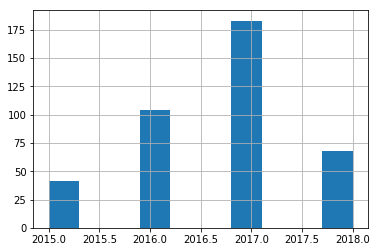

In [29]:
df['year'].hist()


In [30]:
locate = df['location'].value_counts()

In [31]:
locate.index

Index(['北京', '上海', '广州', '深圳', '成都', '长沙', '武汉', '杭州', '厦门', '温州', '重庆', '济南',
       '哈尔滨', '佛山', '石家庄', '实习、全职皆可)', '实习)', '创意型)', '要求男性)', '实习生 应届毕业生方向)',
       '绍兴', '铜仁', '苏州', '南通'],
      dtype='object')

In [32]:
locate.values

array([244,  49,  27,  19,  11,   9,   7,   6,   3,   3,   2,   2,   2,
         2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1])

In [33]:
df_locate = locate.to_frame().reset_index()

In [34]:
df_locate.head(10)

,index,location
0,北京,244
1,上海,49
2,广州,27
3,深圳,19
4,成都,11
5,长沙,9
6,武汉,7
7,杭州,6
8,厦门,3
9,温州,3


In [35]:
from matplotlib import pyplot as plt

## Story point3: To see the amounts of internships the cities account for

## The pie chart indicates Beijing has played a leading role on providing internships,accounting for more than a half.
## It is followed by Shanghai(12.6%),Guangzhou(6.9%),Shenzhen(4.9%) and other Chinese cities.
## In conclusion, media internships are mainly focus on first-tire cities,among which Beijing has the most working oportunities.

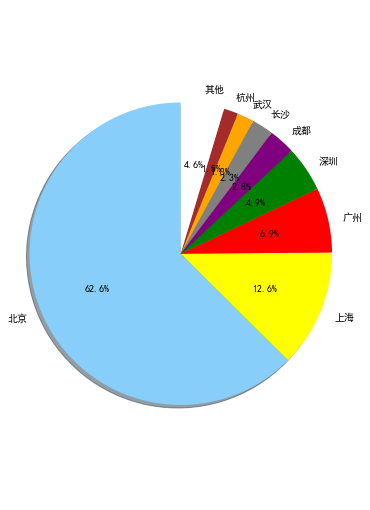

In [38]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(6,9))
labels =[u'北京',u'上海',u'广州',u'深圳',u'成都',u'长沙',u'武汉',u'杭州',u'其他']
sizes = [244,49,27,19,11,9,7,6,18]
colors = ['lightskyblue','yellow','red','green','purple','grey','orange','brown','white']
explode = (0,0,0,0,0,0,0,0,0)
patches,text1,text2 = plt.pie(sizes,
                             explode=explode,
                             labels=labels,
                             colors=colors,
                             autopct = '%1.1f%%',
                             shadow = True,
                             startangle =90,
                             pctdistance = 0.6)
plt.axis('equal')
plt.show()
